In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df=pd.read_csv('./creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
from sklearn.model_selection import train_test_split

def get_preprocessde_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy=get_preprocessde_df(df)
    X_features=df_copy.iloc[:, :-1]
    y_target=df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [38]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:, 1]

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test,pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test,pred)
    confusion = confusion_matrix(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print("정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1:{3:.4f}, auc:{4:.4f}".format(accuracy,precision,recall,f1, roc_auc))

In [40]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [41]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, f1:0.8453, auc:0.9790


In [42]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85279    16]
 [   66    82]]
정확도 : 0.9990, 정밀도 : 0.8367, 재현율 : 0.5541, f1:0.6667, auc:0.9541


<AxesSubplot:xlabel='Amount', ylabel='Density'>

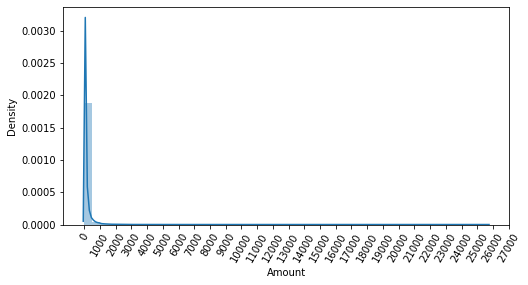

In [43]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [44]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler=StandardScaler()
    amoun_n=scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)
    return df_copy

In [45]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('###LGBM 예측 성능###')
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85279    16]
 [   66    82]]
정확도 : 0.9990, 정밀도 : 0.8367, 재현율 : 0.5541, f1:0.6667, auc:0.9541
###LGBM 예측 성능###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, f1:0.8453, auc:0.9790


In [46]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amoun_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)
    return df_copy

In [47]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)
print("###로지스틱 회귀 예측 성능###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('###LIGHTGBM 예측 성능###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차 행렬
[[85279    16]
 [   66    82]]
정확도 : 0.9990, 정밀도 : 0.8367, 재현율 : 0.5541, f1:0.6667, auc:0.9541
###LIGHTGBM 예측 성능###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, f1:0.8453, auc:0.9790


<AxesSubplot:>

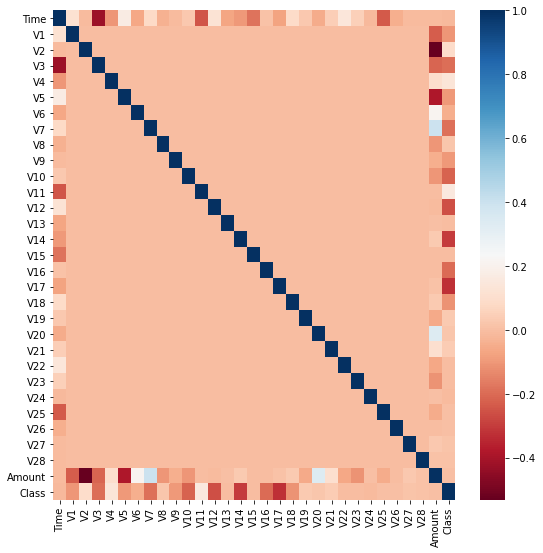

In [48]:
plt.figure(figsize=(9, 9))
corr=card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [49]:
def get_outlier(df=None, columns=None, weight=1.5):
    fraud=df[df['Class']==1][columns]
    quantile_25=np.percentile(fraud.values, 25)
    quantile_75=np.percentile(fraud.values, 75)
    iqr=quantile_75-quantile_25
    iqr_weight=iqr*weight
    lowest_val=quantile_25-iqr_weight
    highest_val=quantile_75+iqr_weight
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [50]:
outlier_index=get_outlier(df=card_df, columns='V14', weight=1.5)
print('이상치 데이터 인덱스 : ', outlier_index )

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [51]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amoun_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)
    outlier_index=get_outlier(df=df_copy, columns='V14',weight=1.5)
    df.copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [52]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('###LGBM 예측 성능###')
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85279    16]
 [   66    82]]
정확도 : 0.9990, 정밀도 : 0.8367, 재현율 : 0.5541, f1:0.6667, auc:0.9541
###LGBM 예측 성능###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, f1:0.8453, auc:0.9790


In [53]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\김현우\appdata\local\programs\python\python39\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\김현우\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학승용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학승용 피처/레이블 데이터 세트 :  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [57]:
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[83935  1360]
 [   16   132]]
정확도 : 0.9839, 정밀도 : 0.0885, 재현율 : 0.8919, f1:0.1610, auc:0.9809


In [93]:
from sklearn.preprocessing import Binarizer

def precision_recall_curve_plot(y_test, pred_porba):
    
    precisions, recalls, thresholds=precision_recall_curve(y_test, pred_porba)
    plt.figure(figsize=(8, 6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall Value')
    plt.legend();plt.grid()
    plt.show()

In [94]:
from sklearn.metrics import precision_recall_curve

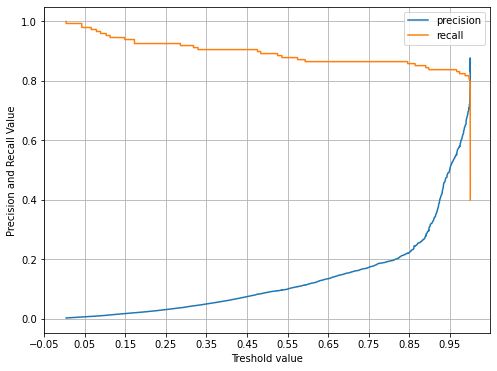

In [95]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [98]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, f1:0.8453, auc:0.9790


In [104]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data=load_breast_cancer()

X_data=cancer_data.data
y_label=cancer_data.target

X_train, X_test, y_train, y_test=train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [107]:
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)
lr_final=LogisticRegression(C=10)

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [111]:
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('RandomForest 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('DecisionTree 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('AdaBoost 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도 : 0.9211
RandomForest 정확도 : 0.9649
DecisionTree 정확도 : 0.9035
AdaBoost 정확도 : 0.9561


In [112]:
pred=np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)
pred=np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [118]:
lr_final.fit(pred, y_test)
final=lr_final.predict(pred)

print('최종 메타 모델 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델 예측 정확도 : 0.9737


In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [139]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf=KFold(n_splits=n_folds, shuffle=False)
    train_fold_pred=np.zeros((X_train_n.shape[0], 1))
    test_pred=np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트 : ', folder_counter, '시작')
        X_tr=X_train_n[train_index]
        y_tr=y_train_n[train_index]
        X_te=X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :]=model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter]=model.predict(X_test_n)
    
    test_pred_mean=np.mean(test_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

In [140]:
knn_train, knn_test=get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test=get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test=get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test=get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)


KNeighborsClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
RandomForestClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
AdaBoostClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작


In [142]:
Stack_final_X_train=np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test=np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 shape : ', X_train.shape, '원본 테스트 피처 shape : ', X_test.shape)
print('스태킹 학습 피처 데이터 shape : ', Stack_final_X_train.shape,
'스태킹 테스트 피처 데이터 shape : ', Stack_final_X_test.shape)

원본 학습 피처 데이터 shape :  (455, 30) 원본 테스트 피처 shape :  (114, 30)
스태킹 학습 피처 데이터 shape :  (455, 4) 스태킹 테스트 피처 데이터 shape :  (114, 4)


In [143]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final=lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도  : {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도  : 0.9737
